In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('data1.csv')

In [3]:
dataset.shape

(33, 11)

In [4]:
df = pd.DataFrame(dataset) 
df.head(14)


,Gender,Age,Medication,Activity_Level,Carbs,Fasting(day#1),Fasting(day#2),Fasting(day#3),Fasting(day#4),Fasting(day#5),Outcome
0,0,45,0,0,0,80,82,81,84,83,Increase
1,1,54,0,0,0,110,113,114,112,115,Increase
2,0,62,0,0,0,156,159,154,155,155,Increase
3,1,78,0,0,0,198,199,201,201,200,Increase
4,0,57,0,0,1,139,142,145,150,152,Increase
5,1,75,0,0,1,80,83,89,90,97,Increase
6,0,81,0,0,1,180,184,187,183,192,Increase
7,1,75,0,0,1,200,200,205,204,204,Increase
8,0,92,0,1,0,149,142,147,150,155,Increase
9,1,40,0,1,0,70,77,84,91,95,Maintain


,Fasting(day#1),Fasting(day#2),Fasting(day#3),Fasting(day#4),Fasting(day#5)
2,156,159,154,155,155


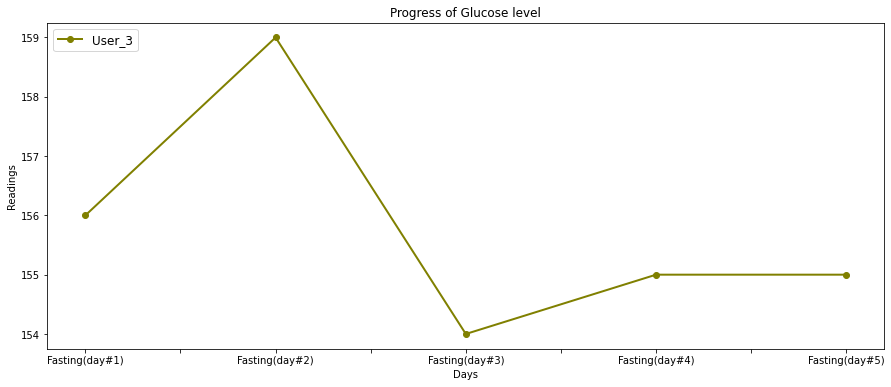

In [5]:
X=df.loc[2:2,['Fasting(day#1)','Fasting(day#2)','Fasting(day#3)','Fasting(day#4)','Fasting(day#5)']]
X.T.plot( figsize=(15,6),marker='o', color='olive', linewidth=2)
plt.title('Progress of Glucose level')
plt.xlabel('Days')
plt.ylabel('Readings')
plt.legend(['User_3'], loc=2, fontsize=12)
X

,Fasting(day#1),Fasting(day#2),Fasting(day#3),Fasting(day#4),Fasting(day#5)
12,139,136,138,132,135


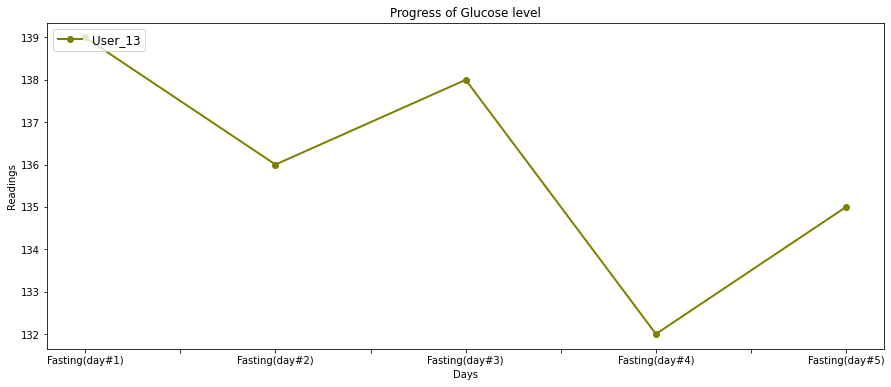

In [6]:
X=df.loc[12:12,['Fasting(day#1)','Fasting(day#2)','Fasting(day#3)','Fasting(day#4)','Fasting(day#5)']]
X.T.plot( figsize=(15,6),marker='o', color='olive', linewidth=2)
plt.title('Progress of Glucose level')
plt.xlabel('Days')
plt.ylabel('Readings')
plt.legend(['User_13'], loc=2, fontsize=12)
X

,Fasting(day#1),Fasting(day#2),Fasting(day#3),Fasting(day#4),Fasting(day#5)
0,80,82,81,84,83


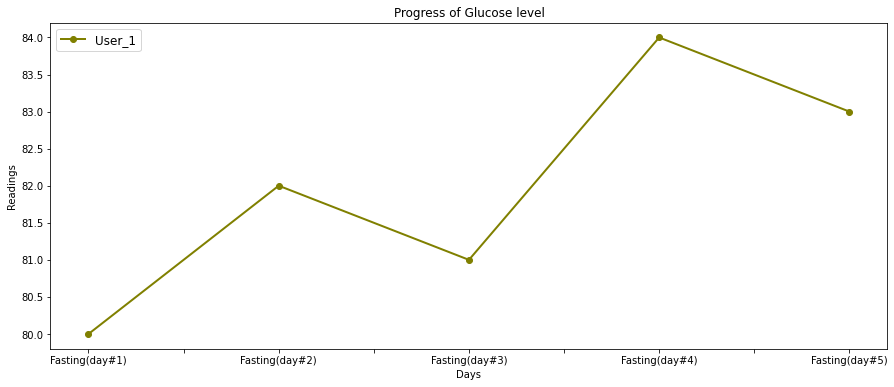

In [7]:
X=df.loc[:0,['Fasting(day#1)','Fasting(day#2)','Fasting(day#3)','Fasting(day#4)','Fasting(day#5)']]
X.T.plot( figsize=(15,6),marker='o', color='olive', linewidth=2)
plt.title('Progress of Glucose level')
plt.xlabel('Days')
plt.ylabel('Readings')
plt.legend(['User_1'], loc=2, fontsize=12)
X

In [8]:
df.groupby('Outcome').size()

Outcome
Decrease     8
Increase    17
Maintain     8
dtype: int64

In [9]:
feature_columns = ['Gender','Age','Medication','Activity_Level','Carbs','Fasting(day#1)','Fasting(day#2)','Fasting(day#3)','Fasting(day#4)','Fasting(day#5)']
x = df[feature_columns].values
y =df['Outcome']
x.shape,y.shape

((33, 10), (33,))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=10)
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (23, 10) (23,)
Test (10, 10) (10,)


In [11]:
from sklearn.model_selection import KFold


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
models = []
models.append(('DT', DecisionTreeClassifier()))
names = []
scores = []
for name, models in models:
    models.fit(x_train, y_train)
    y_pred = models.predict(x_test)
    kfold = KFold(n_splits=5, random_state=5, shuffle= True) 
    score = cross_val_score(models, x, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)  

  Name     Score
0   DT  0.871429


In [13]:
y_pred = models.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0, 0],
       [0, 7, 1],
       [0, 0, 1]], dtype=int64)

In [15]:
x_new=np.array([[0,55,1,0,1,200,202,201,205,203]])
models.fit(x_train, y_train)
y_pred = models.predict(x_new)
print("Prediction: {}".format( y_pred))

Prediction: ['Increase']


In [16]:
x_new=np.array([[1,63,1,1,1,156,152,154,154,153
]])
models.fit(x_train, y_train)
y_pred = models.predict(x_new)
print("Prediction: {}".format( y_pred))

Prediction: ['Maintain']


In [17]:
x_new=np.array([[0,56,1,1,0,192,193,190,189,188
]])
models.fit(x_train, y_train)
y_pred = models.predict(x_new)
print("Prediction: {}".format( y_pred))

Prediction: ['Decrease']


In [18]:
x_new=np.array([[0,56,0,1,0,192,193,190,189,188
]])
models.fit(x_train, y_train)
y_pred = models.predict(x_new)
print("Prediction: {}".format( y_pred))

Prediction: ['Increase']


In [21]:
x_new=np.array([[0,40,0,1,0,92,93,90,90,90
]])
models.fit(x_train, y_train)
y_pred = models.predict(x_new)
print("Prediction: {}".format( y_pred))

Prediction: ['Maintain']


In [23]:
x_new=np.array([[0,40,1,0,1,92,93,90,90,90
]])
models.fit(x_train, y_train)
y_pred = models.predict(x_new)
print("Prediction: {}".format( y_pred))


Prediction: ['Maintain']


In [22]:
x_new=np.array([[1,74,1,0,1,198,202,200,200,204
]])
models.fit(x_train, y_train)
y_pred = models.predict(x_new)
print("Prediction: {}".format( y_pred))

Prediction: ['Increase']
